Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
The shape of x_train is: (104,)
The shape of y_train is:  (104,)
Number of measurements (m): 104
<class 'numpy.float64'>
Cost at initial w: 6220.49
All tests passed!
Gradient at initial w, b (zeros): -515.0076026387502 -10.00013168990385
Using X with shape (4, 1)
All tests passed!
Gradient at test w, b: 205.99239736125003 0.49986831009615407
Iteration    0: Cost 44.216152412303   
Iteration 15000: Cost 0.208321303696   
Iteration 30000: Cost 0.003424541439   
Iteration 45000: Cost 0.000056295190   
Iteration 60000: Cost 0.000000925438   
Iteration 75000: Cost 0.000000015229   
Iteration 90000: Cost 0.000000000266   
Iteration 105000: Cost 0.000000000032   
Iteration 120000: Cost 0.000000000032   
Iteration 135000: Cost 0.000000000032   


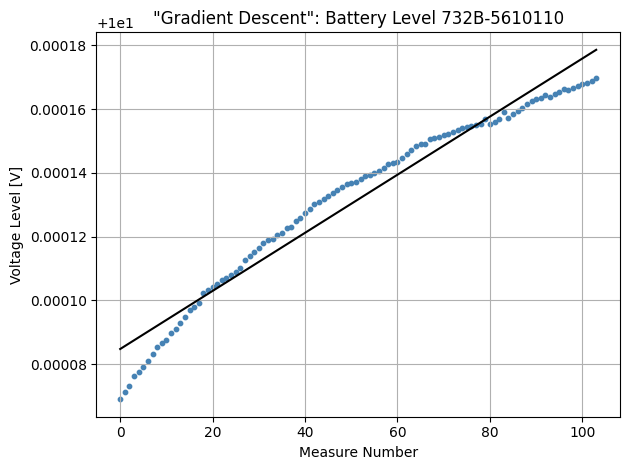

w = 0.00000091 found by gradient descent
b = 10.00008479 V found by gradient descent

Predicted Measure Number = 104, prediction is 10.00017950 V
Predicted Measure Number = 105, prediction is 10.00018041 V
Predicted Measure Number = 106, prediction is 10.00018132 V
Predicted Measure Number = 107, prediction is 10.00018223 V
Predicted Measure Number = 108, prediction is 10.00018314 V
Predicted Measure Number = 109, prediction is 10.00018405 V
Predicted Measure Number = 110, prediction is 10.00018496 V
Predicted Measure Number = 111, prediction is 10.00018587 V
Predicted Measure Number = 112, prediction is 10.00018678 V
Predicted Measure Number = 113, prediction is 10.00018769 V
Predicted Measure Number = 114, prediction is 10.00018861 V
Predicted Measure Number = 115, prediction is 10.00018952 V

Median Absolute Deviation: 0.00001967 V
Total cost is 0.000000000016 V

MSE train: 0.000000000033
MAE train: 0.000004905506
R^2 train: 0.958



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# load the dataset
data = np.loadtxt('110data2.csv', usecols=[1], delimiter=',')
x_train = np.arange(len(data))
y_train = data
#print(data)

# load the dataset
#x_train, y_train = load_data()

# print x_train
print("Type of x_train:",type(x_train))
#print("All elements of x_train are:\n", x_train[:])

# print y_train
print("Type of y_train:",type(y_train))
#print("All elements of y_train are:\n", y_train[:])

print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of measurements (m):', len(x_train))

# Create a scatter plot of the data.
#plt.scatter(x_train, y_train, c='steelblue', s=10) 
# Set the title
#plt.title('"Gradient Descent" - Forecast: Battery Level 732B-5610110')
#plt.ylabel('Voltage Level [V]')
#plt.xlabel('Measure Number')
#plt.tight_layout()
#plt.grid()
#plt.show()

# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.2f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
        
    return dj_dw, dj_db

# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.12f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 150000
alpha = 0.00054

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

# Plot the linear fit
plt.plot(x_train, predicted, c = "black")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, c='steelblue', s=10) 

# Set the title
plt.title('"Gradient Descent": Battery Level 732B-5610110')
plt.ylabel('Voltage Level [V]')
plt.xlabel('Measure Number')
plt.tight_layout()
plt.grid()
plt.show()

print('w = %.8f found by gradient descent' % (w))
print('b = %.8f V found by gradient descent' % (b))

print()
a = 12
predict = np.zeros(a)
for idx, i in enumerate(range(104, 104 + a)):
    predict[idx] = i * w + b
    print(f"Predicted Measure Number = {i}, prediction is {predict[idx]:.8f} V")
    
print()

median_absolute_deviation = np.median(np.abs(y_train - np.median(y_train)))
print(f'Median Absolute Deviation: {median_absolute_deviation:.8f} V')
cost_sum = compute_cost(x_train, y_train, w, b)
print('Total cost is %.12f V' % (cost_sum))
print()

mse_train = mean_squared_error(y_train, predicted)
print(f'MSE train: {mse_train:.12f}')
mae_train = mean_absolute_error(y_train, predicted)
print(f'MAE train: {mae_train:.12f}')
r2_train = r2_score(y_train, predicted)
print(f'R^2 train: {r2_train:.3f}')
print()

In [29]:
for idx, i in enumerate(range(104, 104 + a)):
    predict[idx] = i * w + b
    print(f"{predict[idx]:.8f} V")

10.00017950 V
10.00018041 V
10.00018132 V
10.00018223 V
10.00018314 V
10.00018405 V
10.00018496 V
10.00018587 V
10.00018678 V
10.00018769 V
10.00018861 V
10.00018952 V
